# Simple Linear Regression


In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_data_08-02-2021.csv')
df.head()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000


In [2]:
df.dropna()

,location,district,rooms,size,level,max_levels,price
0,"город Ташкент, Юнусабадский район, Юнусабад 8-...",Юнусабадский,3,57,4,4,52000
1,"город Ташкент, Яккасарайский район, 1-й тупик ...",Яккасарайский,2,52,4,5,56000
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000
...,...,...,...,...,...,...,...
7560,"город Ташкент, Яшнободский район, Городок Авиа...",Яшнободский,1,38,5,5,24500
7561,"город Ташкент, Яшнободский район, 1-й проезд А...",Яшнободский,2,49,1,4,32000
7562,"город Ташкент, Шайхантахурский район, Зульфиях...",Шайхантахурский,2,64,3,9,40000
7563,"город Ташкент, Мирзо-Улугбекский район, Буюк И...",Мирзо-Улугбекский,1,18,1,4,11000


In [3]:
df.isnull().sum()

location      0
district      0
rooms         0
size          0
level         0
max_levels    0
price         0
dtype: int64

In [4]:
df["size"].value_counts()
df["size"] = df["size"].replace("Площадьземли:1сотка", 10)
df["size"] = df["size"].replace("Площадьземли:1сот", 10)

In [5]:
df['size'] = df['size'].astype(float).astype(int)
df["price"] = pd.to_numeric(df["price"], errors='coerce')

In [6]:
df["price"] = df["price"].replace([np.nan, np.inf, -np.inf], df["price"].mean())

In [7]:
df["district"].value_counts()

Чиланзарский         1641
Мирзо-Улугбекский    1382
Юнусабадский          883
Учтепинский           880
Мирабадский           773
Яккасарайский         658
Яшнободский           484
Шайхантахурский       396
Олмазорский           269
Сергелийский          175
Янгихаётский           16
Бектемирский            8
Name: district, dtype: int64

# Qo'lda va formula orqali bajarish

In [8]:
one_district = df[df.district == "Чиланзарский"]
one_district.head()

,location,district,rooms,size,level,max_levels,price
2,"город Ташкент, Чиланзарский район, Чиланзар 2-...",Чиланзарский,2,42,4,4,37000.0
3,"город Ташкент, Чиланзарский район, Чиланзар 9-...",Чиланзарский,3,65,1,4,49500.0
4,"город Ташкент, Чиланзарский район, площадь Актепа",Чиланзарский,3,70,3,5,55000.0
5,"город Ташкент, Чиланзарский район, Чиланзар 6-...",Чиланзарский,1,28,1,4,25500.0
6,"город Ташкент, Чиланзарский район, Чиланзар-16",Чиланзарский,1,30,2,4,21200.0


In [9]:
one_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   location    1641 non-null   object 
 1   district    1641 non-null   object 
 2   rooms       1641 non-null   int64  
 3   size        1641 non-null   int32  
 4   level       1641 non-null   int64  
 5   max_levels  1641 non-null   int64  
 6   price       1641 non-null   float64
dtypes: float64(1), int32(1), int64(3), object(2)
memory usage: 96.2+ KB


In [10]:
one_district["price"] = one_district["price"].astype(int)

C:\Users\Bismilloh\AppData\Local\Temp\ipykernel_252\4208953686.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  one_district["price"] = one_district["price"].astype(int)


In [11]:
one_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 2 to 7564
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   location    1641 non-null   object
 1   district    1641 non-null   object
 2   rooms       1641 non-null   int64 
 3   size        1641 non-null   int32 
 4   level       1641 non-null   int64 
 5   max_levels  1641 non-null   int64 
 6   price       1641 non-null   int32 
dtypes: int32(2), int64(3), object(2)
memory usage: 89.7+ KB


In [12]:
one_district = one_district.drop("location", axis = 1)

In [13]:
one_district

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42,4,4,37000
3,Чиланзарский,3,65,1,4,49500
4,Чиланзарский,3,70,3,5,55000
5,Чиланзарский,1,28,1,4,25500
6,Чиланзарский,1,30,2,4,21200
...,...,...,...,...,...,...
7504,Чиланзарский,3,70,3,4,48000
7522,Чиланзарский,1,20,5,5,18500
7533,Чиланзарский,1,32,3,4,28000
7545,Чиланзарский,3,70,1,4,49800


In [14]:
one_district.describe()

,rooms,size,level,max_levels,price
count,1641.000000,1641.000000,1641.000000,1641.000000,1.641000e+03
mean,2.372334,62.475320,3.288848,5.393662,5.262901e+04
std,1.013177,26.583592,1.894969,2.142442,1.697259e+05
min,1.000000,15.000000,1.000000,2.000000,1.200000e+04
25%,2.000000,45.000000,2.000000,4.000000,3.250000e+04
50%,2.000000,58.000000,3.000000,4.000000,3.950000e+04
75%,3.000000,72.000000,4.000000,5.000000,5.300000e+04
max,8.000000,240.000000,11.000000,12.000000,6.630000e+06


In [15]:
one_district.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1641 entries, 2 to 7564
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   district    1641 non-null   object
 1   rooms       1641 non-null   int64 
 2   size        1641 non-null   int32 
 3   level       1641 non-null   int64 
 4   max_levels  1641 non-null   int64 
 5   price       1641 non-null   int32 
dtypes: int32(2), int64(3), object(1)
memory usage: 76.9+ KB


X-parametrlarni ajratib olish va Y-labelni hosil qilish

In [16]:
X = one_district.drop("price", axis = 1)
X

,district,rooms,size,level,max_levels
2,Чиланзарский,2,42,4,4
3,Чиланзарский,3,65,1,4
4,Чиланзарский,3,70,3,5
5,Чиланзарский,1,28,1,4
6,Чиланзарский,1,30,2,4
...,...,...,...,...,...
7504,Чиланзарский,3,70,3,4
7522,Чиланзарский,1,20,5,5
7533,Чиланзарский,1,32,3,4
7545,Чиланзарский,3,70,1,4


In [17]:
Y = one_district["price"].copy()
Y

2       37000
3       49500
4       55000
5       25500
6       21200
        ...  
7504    48000
7522    18500
7533    28000
7545    49800
7564    22914
Name: price, Length: 1641, dtype: int32

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

In [19]:
one_district['price'] = pd.to_numeric(one_district['price'], errors='coerce')  # Xatolarni NaN bilan almashtiradi
one_district = one_district.dropna(subset=['price'])  # NaN qiymatlarni olib tashlayd

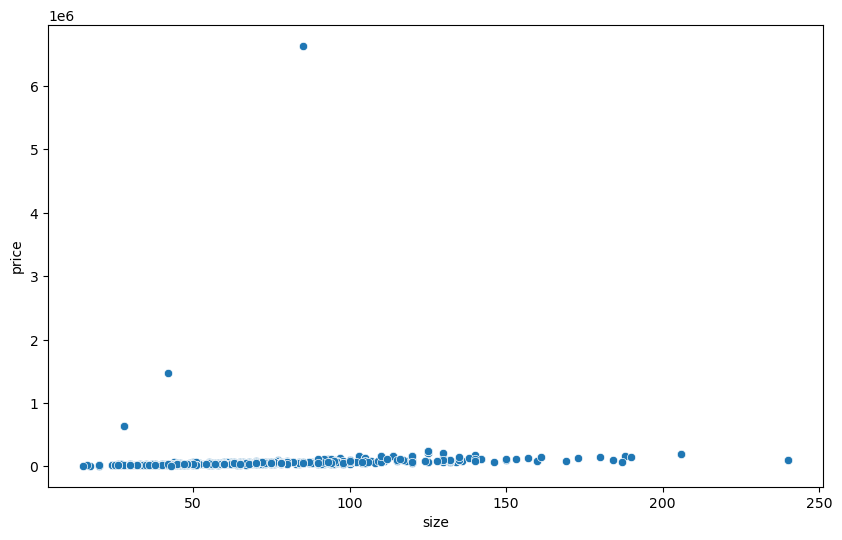

In [20]:
plt.figure(figsize = (10, 6))
sns.scatterplot(data = one_district, x = "size", y = "price")
plt.show()

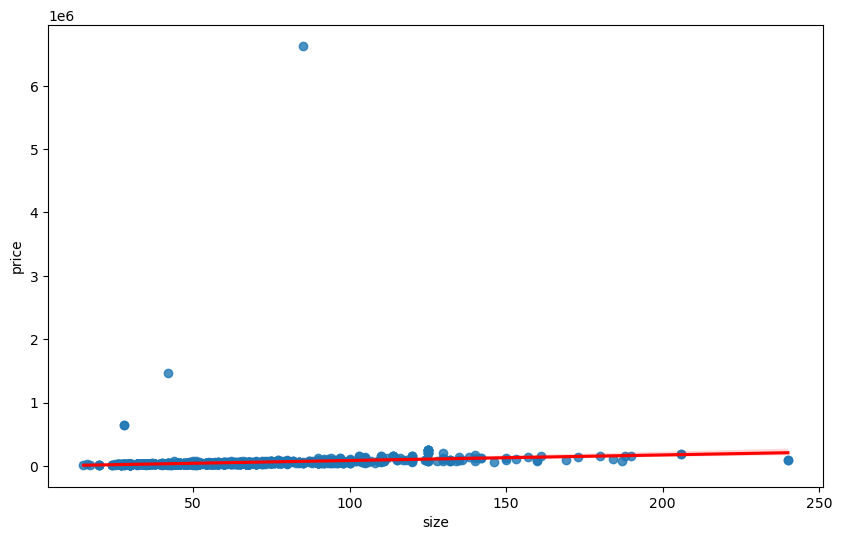

In [21]:
plt.figure(figsize = (10, 6))
sns.regplot(data = one_district, x = "size", y = "price", line_kws = {"color" : "red"})
plt.show()

# y = b0 + b1 * x  orqali Simple Linear Regression chiqarish

In [22]:
xi = one_district["size"]
yi = one_district["price"]
xmean = one_district["size"].sum() / len(one_district["size"])
ymean = one_district["price"].sum() / len(one_district["price"])

In [23]:
a = xi - xmean
b = yi - ymean
c = (xi - xmean) ** 2

Slope (m): 0.6
Intercept (b): 2.2
Predicted values (y_pred): [2.8 3.4 4.  4.6 5.2]


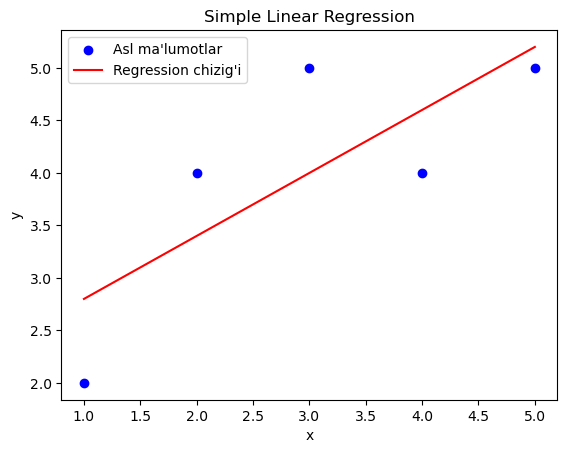

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Dataset
x = np.array([1, 2, 3, 4, 5])  # Mustaqil o'zgaruvchi
y = np.array([2, 4, 5, 4, 5])  # Bog'liq o'zgaruvchi

# 2. Formulalar bo'yicha m (slope) va b (intercept) hisoblash
n = len(x)  # Namuna soni
x_sum = np.sum(x)
y_sum = np.sum(y)
xy_sum = np.sum(x * y)
x2_sum = np.sum(x ** 2)

# Slope (m) hisoblash
m = (n * xy_sum - x_sum * y_sum) / (n * x2_sum - x_sum ** 2)

# Intercept (b) hisoblash
b = (y_sum - m * x_sum) / n

# 3. Modelni qurish: y_pred = mx + b
y_pred = m * x + b

# 4. Natijalarni chiqarish
print(f"Slope (m): {m}")
print(f"Intercept (b): {b}")
print(f"Predicted values (y_pred): {y_pred}")

# 5. Grafik ko'rinish
plt.scatter(x, y, color="blue", label="Asl ma'lumotlar")
plt.plot(x, y_pred, color="red", label="Regression chizig'i")
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Simple Linear Regression")
plt.show()


# tepadagi Simple Linear Regression modelini formulasi orqali bajargan bo'lsak, Scikit Learn ichida tayyor model mavjud


In [26]:
one_district.shape

(1641, 6)

In [27]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(one_district, test_size = 0.1, random_state = 42)

Linear Regression for Machine Learning

In [28]:
from sklearn.linear_model import LinearRegression

LR_model = LinearRegression()
LR_model.fit()